<br /> <span style="font-family: Open Sans; font-weight: 400; font-size: 24px; background-color: #A9DFBF;">MODELS USED
  
    ONLY on training dataset
    1.XGBoost
    2.Gradient Boosting
    
    
    ON Combined dataset without outliers
       1.RANDOM FOREST
       2.XGBoost
       3.Gradient Boost


    

</span>


In [1]:
import pandas as pd

In [2]:
df2=pd.read_csv("/Users/kanikagulati/Desktop/imp/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv")

In [3]:
df2

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [4]:
df2.nunique()

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      11
Sourcing Cost        4529
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of the original DataFrame
df_train_encoded = df2.copy()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column and encode it
for column in ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']:
    df_train_encoded[column] = label_encoder.fit_transform(df2[column])

In [6]:
df_train_encoded

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,1,1,May-21,10.16
1,1,0,44,0,1,1,Oct-20,134.28
2,2,1,12,0,1,1,Dec-20,12.46
3,2,0,9,3,2,1,Feb-21,107.22
4,1,0,19,0,1,0,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,1,0,40,0,1,1,Jul-20,136.47
550172,2,0,5,0,1,0,Oct-20,72.56
550173,1,0,40,0,2,1,Mar-21,147.64
550174,1,0,42,0,2,1,Feb-21,150.04


In [7]:
df_train_encoded['Month of Sourcing'] = pd.to_datetime(df_train_encoded['Month of Sourcing'], format='%b-%y')

In [8]:
df_train_encoded

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,1,1,2021-05-01,10.16
1,1,0,44,0,1,1,2020-10-01,134.28
2,2,1,12,0,1,1,2020-12-01,12.46
3,2,0,9,3,2,1,2021-02-01,107.22
4,1,0,19,0,1,0,2020-11-01,197.76
...,...,...,...,...,...,...,...,...
550171,1,0,40,0,1,1,2020-07-01,136.47
550172,2,0,5,0,1,0,2020-10-01,72.56
550173,1,0,40,0,2,1,2021-03-01,147.64
550174,1,0,42,0,2,1,2021-02-01,150.04


In [9]:
df_test=pd.read_csv("/Users/kanikagulati/Desktop/imp/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv")

In [10]:
df_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


In [11]:
df_test['Month of Sourcing'] = pd.to_datetime(df_test['Month of Sourcing'], format='%b-%y')

In [12]:
df_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-01,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-01,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-01,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-01,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-01,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-01,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-01,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-01,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-01,32.32


In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame (assuming df_test contains your test data)
df_test_encoded = df_test.copy()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column and encode it
for column in ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']:
    df_test_encoded[column] = label_encoder.fit_transform(df_test[column])

# Now df_test_encoded contains the test data with label encoded categorical columns


In [14]:
df_test_encoded

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,2021-06-01,103.68
1,0,0,1,0,1,1,2021-06-01,155.75
2,0,0,1,1,1,1,2021-06-01,143.02
3,0,0,2,0,1,1,2021-06-01,139.39
4,0,0,11,0,1,1,2021-06-01,169.42
...,...,...,...,...,...,...,...,...
91,2,0,37,0,2,0,2021-06-01,89.57
92,2,0,43,0,1,1,2021-06-01,114.57
93,2,0,43,0,2,1,2021-06-01,111.26
94,2,1,12,0,1,1,2021-06-01,32.32


<br /> <span style="font-family: Open Sans; font-weight: 400; font-size: 24px; background-color: #F8C471;">GRADIENT BOOSTING</span>


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predict the sourcing cost for June 2021
predicted_sourcing_cost_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(actual_sourcing_cost, predicted_sourcing_cost_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(actual_sourcing_cost, predicted_sourcing_cost_gb)
r2_gb = r2_score(actual_sourcing_cost, predicted_sourcing_cost_gb)

# Print the evaluation metrics
print("Gradient Boosting Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_gb)
print("Root Mean Squared Error (RMSE):", rmse_gb)
print("Mean Absolute Error (MAE):", mae_gb)
print("R-squared (R^2) Score:", r2_gb)


Gradient Boosting Regression Evaluation Metrics:
Mean Squared Error (MSE): 1542.2918416252862
Root Mean Squared Error (RMSE): 39.272023650752786
Mean Absolute Error (MAE): 24.552612414970024
R-squared (R^2) Score: 0.4315091534907922


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict the sourcing cost for June 2021
predicted_sourcing_cost_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(actual_sourcing_cost, predicted_sourcing_cost_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(actual_sourcing_cost, predicted_sourcing_cost_rf)
r2_rf = r2_score(actual_sourcing_cost, predicted_sourcing_cost_rf)

# Print the evaluation metrics
print("Random Forest Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R^2) Score:", r2_rf)


Random Forest Regression Evaluation Metrics:
Mean Squared Error (MSE): 1503.6980606712689
Root Mean Squared Error (RMSE): 38.77754583094795
Mean Absolute Error (MAE): 20.16385468011733
R-squared (R^2) Score: 0.44573487304165194


<br /> <span style="font-family: Open Sans; font-weight: 400; font-size: 24px; background-color: #F8C471;">XG BOOST</span>


In [91]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [88]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Separate features and target variable for training
X_train = df_train_encoded.drop(columns=['Month of Sourcing', 'Sourcing Cost'])
y_train = df_train_encoded['Sourcing Cost']

# Train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Separate features and target variable for testing
X_test = df_test_encoded.drop(columns=['Month of Sourcing', 'Sourcing Cost'])
y_test = df_test_encoded['Sourcing Cost']

# Predict the sourcing cost for the test dataset
predicted_sourcing_cost_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, predicted_sourcing_cost_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, predicted_sourcing_cost_xgb)
r2_xgb = r2_score(y_test, predicted_sourcing_cost_xgb)

# Print the evaluation metrics
print("XGBoost Regression Evaluation Metrics on Test Dataset:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("R-squared (R^2) Score:", r2_xgb)


XGBoost Regression Evaluation Metrics on Test Dataset:
Mean Squared Error (MSE): 1485.8694050292331
Root Mean Squared Error (RMSE): 38.5469766003669
Mean Absolute Error (MAE): 20.08440975586573
R-squared (R^2) Score: 0.45230653948279786


<br /> <span style="font-family: Open Sans; font-weight: 400; font-size: 24px; background-color: #A9DFBF;">COMBINING TEST AND TRAIN DATASET</span>


In [93]:
# Concatenate the encoded training and testing DataFrames
df_combined = pd.concat([df_train_encoded, df_test_encoded], ignore_index=True)

# Display the combined DataFrame
print(df_combined)

        ProductType  Manufacturer  Area Code  Sourcing Channel  Product Size  \
0                 2             0         19                 3             1   
1                 1             0         44                 0             1   
2                 2             1         12                 0             1   
3                 2             0          9                 3             2   
4                 1             0         19                 0             1   
...             ...           ...        ...               ...           ...   
550267            2             0         37                 0             2   
550268            2             0         43                 0             1   
550269            2             0         43                 0             2   
550270            2             1         12                 0             1   
550271            2             2         14                 2             1   

        Product Type Month of Sourcing 

In [94]:
df_combined

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,1,1,2021-05-01,10.16
1,1,0,44,0,1,1,2020-10-01,134.28
2,2,1,12,0,1,1,2020-12-01,12.46
3,2,0,9,3,2,1,2021-02-01,107.22
4,1,0,19,0,1,0,2020-11-01,197.76
...,...,...,...,...,...,...,...,...
550267,2,0,37,0,2,0,2021-06-01,89.57
550268,2,0,43,0,1,1,2021-06-01,114.57
550269,2,0,43,0,2,1,2021-06-01,111.26
550270,2,1,12,0,1,1,2021-06-01,32.32


<br /> <span style="font-family: Open Sans; font-weight: 400; font-size: 30px; background-color: #BB8FCE;">Removing outliers using IQR</span>


In [95]:
import pandas as pd

# Calculate the IQR for the 'Sourcing Cost' column
Q1 = df_combined['Sourcing Cost'].quantile(0.25)
Q3 = df_combined['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1


In [96]:
threshold = 1.5
outliers = (df_combined['Sourcing Cost'] < (Q1 - threshold * IQR)) | (df_combined['Sourcing Cost'] > (Q3 + threshold * IQR))
df_combined_no_outliers = df_combined[~outliers]

In [97]:
df_combined_no_outliers.shape

(547606, 8)

In [98]:
df2.shape

(550176, 8)

<br /> <span style="font-family: Open Sans; font-weight: 400; font-size: 30px; background-color: #CCFF55;">Number of outliers detected</span>


In [99]:
# Calculate the number of outliers detected
num_outliers_detected = df2.shape[0] - df_combined_no_outliers.shape[0]

# Print the number of outliers detected
print("Number of outliers detected:", num_outliers_detected)


Number of outliers detected: 2570


<br /> <span style="font-family: Open Sans; font-weight: 400; font-size: 30px; background-color: #FFCC77;">XGBoost on without outliers dataset</span>

In [107]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Separate features (X) and target variable (y)
X = df_combined_no_outliers.drop(columns=['Month of Sourcing', 'Sourcing Cost'])
y = df_combined_no_outliers['Sourcing Cost']

# Train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, y)

# Select data for June 2021
X_june_21 = X[X['Month'] == 6]  
y_june_21 = y[X['Month'] == 6]  


predicted_sourcing_cost_xgb = xgb_model.predict(X_june_21)


mse_xgb = mean_squared_error(y_june_21, predicted_sourcing_cost_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_june_21, predicted_sourcing_cost_xgb)
r2_xgb = r2_score(y_june_21, predicted_sourcing_cost_xgb)

# Print evaluation metrics
print("XGBoost Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("R-squared (R^2) Score:", r2_xgb)


XGBoost Regression Evaluation Metrics:
Mean Squared Error (MSE): 412.6276484301897
Root Mean Squared Error (RMSE): 20.313238255634914
Mean Absolute Error (MAE): 11.683643662134806
R-squared (R^2) Score: 0.847904893990761


In [108]:
predicted_sourcing_cost_xgb

array([108.21026 , 145.75316 , 143.2232  , 140.33745 , 162.36293 ,
       169.58142 ,  47.817165,  51.143112, 134.51254 , 130.75006 ,
       133.26183 , 126.45361 ,  83.9447  , 140.47847 , 137.49887 ,
       145.61884 , 145.16673 , 138.37195 , 138.97908 , 143.0419  ,
       144.6374  , 141.78583 , 143.29053 ,  22.380054,  78.9635  ,
        24.892775,  27.591522,  33.818184,  26.722076, 230.15909 ,
       185.15144 , 166.82845 ,  27.627693,  27.447243,  73.27032 ,
       146.9129  , 155.40987 , 139.38298 , 142.1802  , 112.16116 ,
        62.22433 ,  67.47656 , 167.97801 , 163.76515 , 139.01561 ,
        38.005825, 204.03947 , 202.13722 ,  98.71406 ,  51.51241 ,
        51.567616, 126.10374 ,  58.969555,  56.987648, 140.91127 ,
        93.89392 , 123.32032 , 156.28578 , 128.0998  , 120.39479 ,
       128.48654 , 140.41464 , 142.26817 , 137.26573 , 137.07022 ,
       138.74123 , 139.34367 , 138.14273 , 139.54518 , 145.19814 ,
       141.85303 , 111.30017 ,  71.08342 ,  19.720634,  12.858

<br /> <span style="font-family: Open Sans; font-weight: 400; font-size: 30px; background-color: #FFCC77;">Random Forest  on without outliers dataset</span>

In [109]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Predict the sourcing cost for June 2021
predicted_sourcing_cost_rf = rf_model.predict(X_june_21)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_june_21, predicted_sourcing_cost_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_june_21, predicted_sourcing_cost_rf)
r2_rf = r2_score(y_june_21, predicted_sourcing_cost_rf)

# Print evaluation metrics
print("Random Forest Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R^2) Score:", r2_rf)


Random Forest Regression Evaluation Metrics:
Mean Squared Error (MSE): 167.15589994437238
Root Mean Squared Error (RMSE): 12.92887852616662
Mean Absolute Error (MAE): 6.553481697202376
R-squared (R^2) Score: 0.9383861105312957


<br /> <span style="font-family: Open Sans; font-weight: 400; font-size: 30px; background-color: #AF7AC5;">Gradient Boost</span>

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

# Predict the sourcing cost for June 2021
predicted_sourcing_cost_gb = gb_model.predict(X_june_21)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_june_21, predicted_sourcing_cost_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_june_21, predicted_sourcing_cost_gb)
r2_gb = r2_score(y_june_21, predicted_sourcing_cost_gb)

# Print evaluation metrics
print("Gradient Boosting Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_gb)
print("Root Mean Squared Error (RMSE):", rmse_gb)
print("Mean Absolute Error (MAE):", mae_gb)
print("R-squared (R^2) Score:", r2_gb)


Gradient Boosting Regression Evaluation Metrics:
Mean Squared Error (MSE): 1219.975378165764
Root Mean Squared Error (RMSE): 34.92814593083583
Mean Absolute Error (MAE): 22.788344832999105
R-squared (R^2) Score: 0.550315435292078


<br /> <span style="font-family: Open Sans; font-weight: 400; font-size: 30px; background-color: #A9CCE3  ;">COMPARISION OF EVUALUATION METRICS</span>

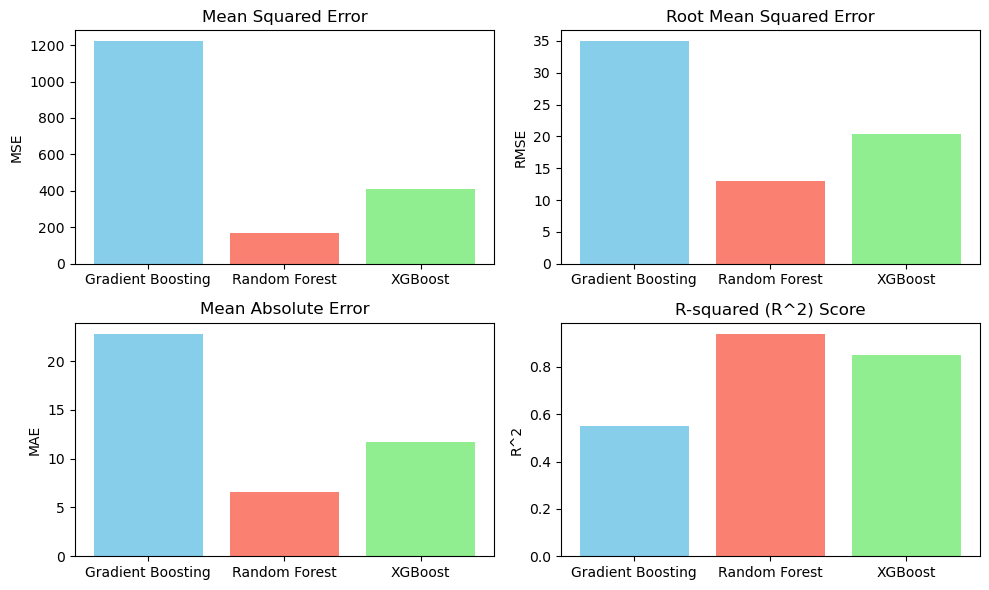

In [114]:
import matplotlib.pyplot as plt

# Evaluation metrics
mse_scores = [mse_gb, mse_rf, mse_xgb]
rmse_scores = [rmse_gb, rmse_rf, rmse_xgb]
mae_scores = [mae_gb, mae_rf, mae_xgb]
r2_scores = [r2_gb, r2_rf, r2_xgb]
models = ['Gradient Boosting', 'Random Forest', 'XGBoost']

# Plotting
plt.figure(figsize=(10, 6))

# Mean Squared Error
plt.subplot(2, 2, 1)
plt.bar(models, mse_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')

# Root Mean Squared Error
plt.subplot(2, 2, 2)
plt.bar(models, rmse_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')

# Mean Absolute Error
plt.subplot(2, 2, 3)
plt.bar(models, mae_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')

# R-squared
plt.subplot(2, 2, 4)
plt.bar(models, r2_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('R-squared (R^2) Score')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()
